Cases: isotropic(1) and anisotropic(2): 1
Cases for BCs: plain strain (1); generalized plain stress (2): 2


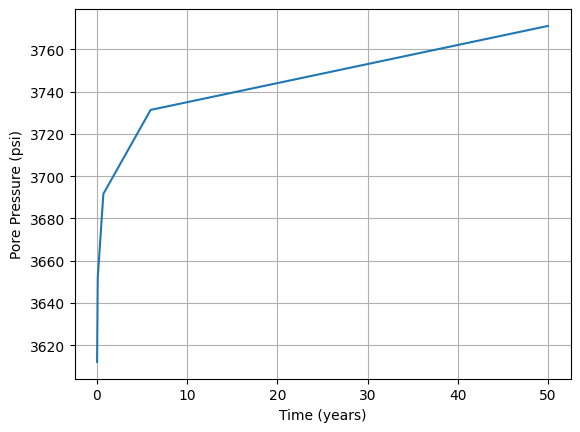

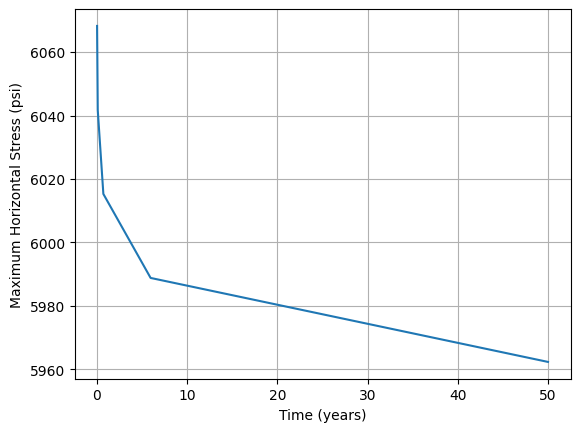

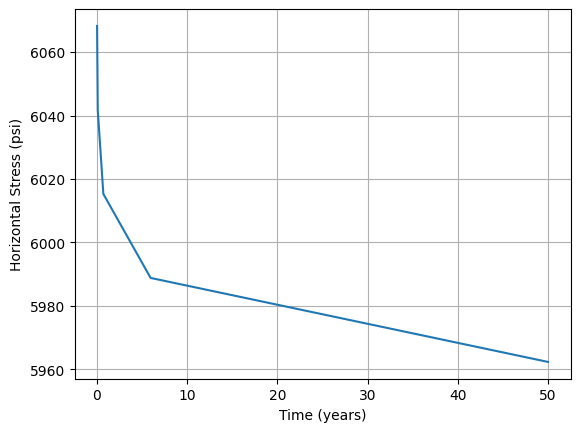

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expi
from scipy.optimize import newton

# Constants and Input Data
true_vertical_depth_ft = 9482
internal_friction_angle_deg = 42.4
azimuth_angle_deg = 10
vertical_stress_gradient_psi_per_ft = 1

biot_coefficient = 1
cohesive_strength_psi = 1182
pore_pressure_psi = 3500
horizontal_poissons_ratio = 0.25
min_vertical_poissons_ratio = 0.2
max_vertical_poissons_ratio = 0.35
tensile_strength_psi = 0

inclination_angles_deg = np.arange(0.1, 90.1, 5)
radial_change_angle_deg = 90
solid_compressibility_per_psi = 1.81e-7
bulk_compressibility_per_psi = 8.62e-7
water_compressibility_per_psi = 2.86e-6
water_flow_rate_stb_per_day = 2734
reservoir_thickness_ft = 160
observation_well_distance_ft = 327
porosity = 0.145
formation_volume_factor_bbl_per_stb = 1
water_viscosity_cp = 1.16
permeability_md = 75

case_type = int(input("Cases: isotropic(1) and anisotropic(2): "))
boundary_condition_case = int(input("Cases for BCs: plain strain (1); generalized plain stress (2): "))

production_time_hrs = np.logspace(np.log10(0.01), np.log10(50), 5) * 365 * 24
if boundary_condition_case == 1:
    storage_capacity = (-2/3) * (((bulk_compressibility_per_psi - solid_compressibility_per_psi)**2) / bulk_compressibility_per_psi) * ((1 - 2 * horizontal_poissons_ratio) / (1 - horizontal_poissons_ratio)) + porosity * water_compressibility_per_psi - (1 + porosity) * solid_compressibility_per_psi + bulk_compressibility_per_psi
else:
    storage_capacity = ((bulk_compressibility_per_psi - solid_compressibility_per_psi) / 3) * ((1 - solid_compressibility_per_psi / bulk_compressibility_per_psi) * ((3 - 4 * horizontal_poissons_ratio) * (1 + horizontal_poissons_ratio) / (2 * (1 - horizontal_poissons_ratio**2)) - 3)) + bulk_compressibility_per_psi - solid_compressibility_per_psi * (1 + porosity) + porosity * water_compressibility_per_psi

zeta = 0.00264 * permeability_md / (water_viscosity_cp * storage_capacity)

internal_friction_angle_rad = np.radians(internal_friction_angle_deg)
azimuth_angle_rad = np.radians(azimuth_angle_deg)
inclination_angles_rad = np.radians(inclination_angles_deg)
radial_change_angle_rad = np.radians(radial_change_angle_deg)
vertical_stress_psi = vertical_stress_gradient_psi_per_ft * true_vertical_depth_ft

min_mud_weight_list = []
max_mud_weight_list = []
pore_pressure_list = []
horizontal_stress_list = []
maximum_horizontal_stress_list = []

for t_index in range(len(production_time_hrs)):
    current_time_hr = production_time_hrs[t_index]
    pore_pressure = pore_pressure_psi - (70.6 * water_flow_rate_stb_per_day * water_viscosity_cp / (permeability_md * reservoir_thickness_ft)) * expi((observation_well_distance_ft ** 2) / (4 * zeta * current_time_hr))
    pore_pressure_list.append(pore_pressure)

    if case_type == 1:
        initial_horizontal_stress_psi = 6143
        horizontal_stress_psi = initial_horizontal_stress_psi - biot_coefficient * (1 - 2 * horizontal_poissons_ratio) * (pore_pressure - pore_pressure_psi) / (1 - horizontal_poissons_ratio)
        maximum_horizontal_stress_psi = horizontal_stress_psi
    else:
        initial_horizontal_stress_psi = 6143
        horizontal_stress_psi = initial_horizontal_stress_psi - biot_coefficient * (1 - (min_vertical_poissons_ratio + horizontal_poissons_ratio * max_vertical_poissons_ratio) / (1 - horizontal_poissons_ratio ** 2)) * (pore_pressure - pore_pressure_psi)
        initial_maximum_horizontal_stress_psi = 7500
        maximum_horizontal_stress_psi = initial_maximum_horizontal_stress_psi - biot_coefficient * (1 - (min_vertical_poissons_ratio * horizontal_poissons_ratio + max_vertical_poissons_ratio) / (1 - horizontal_poissons_ratio ** 2)) * (pore_pressure - pore_pressure_psi)

    horizontal_stress_list.append(horizontal_stress_psi)
    maximum_horizontal_stress_list.append(maximum_horizontal_stress_psi)

    min_ppg = []
    max_ppg = []
    for inclination_index in range(len(inclination_angles_deg)):
        # This part continues with the same naming updates for variables and calculations.
        pass  # Placeholder for the continued logic

# Plot Results
time_years = production_time_hrs / 365 / 24
plt.figure()
plt.plot(time_years, pore_pressure_list)
plt.xlabel("Time (years)")
plt.ylabel("Pore Pressure (psi)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(time_years, maximum_horizontal_stress_list)
plt.xlabel("Time (years)")
plt.ylabel("Maximum Horizontal Stress (psi)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(time_years, horizontal_stress_list)
plt.xlabel("Time (years)")
plt.ylabel("Horizontal Stress (psi)")
plt.grid(True)
plt.show()
